# EXPLORATORY DATA ANALYSIS

## ORGANIZACIÓN DEL ANÁLISIS

El análisis se organiza por secciones:
1. PREPARACIÓN Y LIMPIEZA DEL DATASET
2. ESTADÍSTICA DESCRIPTIVA DE VARIABLES NUMÉRICAS
3. DISTRIBUCIÓN ESPACIAL DE SINIESTROS

In [92]:

import pandas as pd 
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point
import branca.colormap as cm
from IPython.display import display
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

## 1. PREPARACIÓN Y LIMPIEZA DEL DATASET

### 1.1 Carga el archivo homicidios.xlsx y explora nombres y tipos de columnas

In [108]:
'''Lee el archivo homicidios.xlsx y lo guarda en el dataframe "homicidios_raw"'''
homicidios_raw = pd.read_excel(r"G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_II\PRII - Accidentes viales\ORIGINALES\homicidios.xlsx")
victimas_raw = pd.read_excel(r"G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_II\PRII - Accidentes viales\ORIGINALES\homicidios.xlsx", sheet_name='VICTIMAS')



In [167]:
victimas_raw = pd.read_excel(r"G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_II\PRII - Accidentes viales\ORIGINALES\homicidios.xlsx", sheet_name='VICTIMAS')

In [109]:
'''Imprime nombres y número de campos de la hoja HECHOS, número de filas y el tipo de dato que contienen'''
homicidios_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [27]:
'''Imprime las primeras filas del dataframe de la hoja HECHOS'''
print(homicidios_raw.tail())

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura        Cruce  \
691        AV. RIESTRA Y MOM       AVENIDA  ...     NaN          MOM   
692  AU DELLEPIANE Y LACARRA     AUTOPISTA  ...     NaN  LACARRA AV.   
693      AV. GAONA Y TERRADA       AVENIDA  ...     NaN      TERRADA   
694       AV. EVA PERON 4071       AVENIDA  ...  4071.0          NaN   
695  PADRE CARLOS MUJICA 709         CALLE  ...   709.0          NaN   

                          Dirección Normalizada COMUNA  \
691                           RIESTRA AV. y MOM      7   
692  DELLEPIANE, LUIS, TTE. GRAL. y 

In [142]:
'''Imprime las últimas filas del dataframe de la hoja HECHOS'''
print(homicidios_raw.tail())

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura        Cruce  \
691        AV. RIESTRA Y MOM       AVENIDA  ...     NaN          MOM   
692  AU DELLEPIANE Y LACARRA     AUTOPISTA  ...     NaN  LACARRA AV.   
693      AV. GAONA Y TERRADA       AVENIDA  ...     NaN      TERRADA   
694       AV. EVA PERON 4071       AVENIDA  ...  4071.0          NaN   
695  PADRE CARLOS MUJICA 709         CALLE  ...   709.0          NaN   

                          Dirección Normalizada COMUNA  \
691                           RIESTRA AV. y MOM      7   
692  DELLEPIANE, LUIS, TTE. GRAL. y 

In [178]:
'''Imprime nombres y número de campos de la hoja VICTIMAS, número de filas y el tipo de dato que contienen'''
victimas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


### 1.2 Configura las columnas de acuerdo a su contenido
Hallazgos:
- En esta base de datos, las variables numéricas no representan cantidades propiamente (salvo el número de víctimas) sino que se trata de variables temporales y geográficas.


In [110]:
'''Dataframe de la hoja HECHOS'''
# Campos con datos de TIEMPO: convierte a formato de fecha y horas, manejando posibles errores con el método 'coerce' el cual convierte a NaT (Not a Time) aquellos valores que no corresponden a fecha u hora
homicidios_raw['FECHA'] = pd.to_datetime(homicidios_raw['FECHA'], format='%Y/%m/%d',errors='coerce')
homicidios_raw['AAAA'] = pd.to_numeric(homicidios_raw['AAAA'], errors='coerce')
homicidios_raw['MM'] = pd.to_numeric(homicidios_raw['MM'], errors='coerce')
homicidios_raw['DD'] = pd.to_numeric(homicidios_raw['DD'], errors='coerce')
homicidios_raw['HORA'] = pd.to_datetime(homicidios_raw['HORA'], format='%H:%M:%S', errors='coerce').dt.hour
# homicidios_raw['AAAA'] = pd.to_datetime(homicidios_raw['AAAA'], format='%Y',errors='coerce')
# homicidios_raw['MM'] = pd.to_datetime(homicidios_raw['MM'], format='%m',errors='coerce')
# homicidios_raw['DD'] = pd.to_datetime(homicidios_raw['DD'], format='%d',errors='coerce')
# homicidios_raw['HORA'] = pd.to_datetime(homicidios_raw['HORA'], format='%H:%M:%S',errors='coerce')
# homicidios_raw['HH'] = pd.to_datetime(homicidios_raw['HORA'], format='%H',errors='coerce')

# Campos con coordenadas geográficas.Antes de convertirlos a tipo FLOAT hay que limpiar los campos, pues hay alguna fila con un caracter incorrecto: "." También cuenta el número de filas con valores NaN
homicidios_raw['pos x'] = homicidios_raw['pos x'].replace({'.': None})
homicidios_raw['pos y'] = homicidios_raw['pos y'].replace({'.': None})
homicidios_raw['pos x'] = pd.to_numeric(homicidios_raw['pos x'], errors='coerce')
homicidios_raw['pos y'] = pd.to_numeric(homicidios_raw['pos y'], errors='coerce')

'''Dataframe de la hoja VICTIMAS'''
victimas_raw['EDAD'] = pd.to_numeric(victimas_raw['EDAD'], errors='coerce')



### 1.3. Explora valores nulos
Hallazgos: 
- Los campos que refieren a un domicilio ("Calle","Altura","Cruce","Dirección Normalizada") tiene poca integridad, ya que en conjunto suman más de 700 valores nulos. Esto significa que pocos registros (menos de 100 de un total de 696) de homicidos tienen completa esta información. 
- A pesar del punto anterior, se tienen las coordenadas de prácticamente todos los registros en los campos que refieren coordenadas ("XY (CABA), "pos x" y "pos y"). Estos campos tienen un alto nivel de integridad, pues poseen 0.4% de datos nulos en toda la base de datos. Es decir, 12 registros de homicidios de un total de 696 carecen de coordenadas.



In [176]:
''' Cuenta los datos nulos de la hoja de HECHOS'''
# Cuenta el número de nulos en cada campo del dataframe
nan_counts = homicidios_raw.isna().sum()
print(nan_counts)

# Cuenta el número de nulos en todo el dataframe
nan_counts_total = homicidios_raw.isna().sum().sum()
print('El total de valores nulos en el dataframe HECHOS es: ',nan_counts_total)

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Altura                   555
Cruce                    159
Dirección Normalizada      0
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
día_semana                 0
dtype: int64
El total de valores nulos en el dataframe HECHOS es:  715


In [180]:
''' Cuenta los datos nulos de la hoja de VICTIMAS '''
# Cuenta el número de nulos en cada campo del dataframe
nan_counts = victimas_raw.isna().sum()
print(nan_counts)

# Cuenta el número de nulos en todo el dataframe
nan_counts_total = victimas_raw.isna().sum().sum()
print('El total de valores nulos en el dataframe es: ',nan_counts_total)

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                   53
FECHA_FALLECIMIENTO     0
dtype: int64
El total de valores nulos en el dataframe es:  53


In [30]:
'''Muestra las filas que contienen al menos un dato NULO, excluye los campos que refieren a un domicilio'''
# Filtrar filas que tienen al menos un NaN, excluye los campos que refieren a un domicilio
rows_with_nan = homicidios_raw[homicidios_raw.drop(columns=['Calle','Altura','Cruce','Dirección Normalizada']).isna().any(axis=1)]
# Mostrar las filas con al menos un NaN
print(rows_with_nan)

# Suma los valores nulos en sin considerar columnas que refieren a un domicilio
nan_counts_rwn = rows_with_nan.isna().sum().sum()
print('El total de valores nulos en el dataframe es: ',nan_counts_rwn)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD  HORA  HH  \
38   2016-0052           1 2016-04-20  2016   4  20  20.0  20   
106  2016-0136           1 2016-10-25  2016  10  25   0.0   0   
119  2016-0151           1 2016-11-18  2016  11  18  20.0  20   
139  2016-0174           1 2016-12-27  2016  12  27   0.0   0   
176  2017-0042           1 2017-04-10  2017   4  10   9.0   9   
180  2017-0050           2 2017-04-28  2017   4  28  11.0  11   
181  2017-0051           1 2017-05-01  2017   5   1   3.0   3   
256  2017-0140           1 2017-11-19  2017  11  19  23.0  23   
313  2018-0039           1 2018-04-21  2018   4  21  22.0  22   
518  2019-0103           1 2019-12-18  2019  12  18   NaN  SD   
546  2020-0026           1 2020-05-17  2020   5  17   6.0   6   
559  2020-0039           1 2020-09-01  2020   9   1  19.0  19   
621  2021-0023           1 2021-03-01  2021   3   1   9.0   9   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  \
38             

In [31]:
'''Porcentaje de datos nulos en el dataframe (excluye los campos que refieren a un domicilio)'''
porc_null_dom = (nan_counts_total/homicidios_raw.size)*100
print('El porcentaje de datos nulos es: ', round(porc_null_dom,1),'%')

porc_null = (nan_counts_rwn/homicidios_raw.size)*100
print('El porcentaje de datos nulos excluyendo domicilios es: ', round(porc_null,1),'%')


El porcentaje de datos nulos es:  5.3 %
El porcentaje de datos nulos excluyendo domicilios es:  0.4 %


## 2. Estadística descriptiva para variables numéricas
Hallazgos:
 Mediante la exploración de Máximos y mínimos, estadística descriptiva e histogramas se observan algunos patrones de acuerdo a la escala de tiempo: 
- ANUAL: los siniestros aumentaron a un máximo de 142 en el año 2018 para luego disminuir continuamente hasta 2021, con un mínimo en 2020 de 766 siniestros.
- MENSUAL: la frecuencia de siniestros varía a lo largo del año pero con un claro pico en el mes de diciembre con 77 eventos.
- DÍA DE LA SEMANA: no parece existir una variación importante a largo de los días de la semana. Las variaciones son muy cercanas a la media de acuerdo al histograma.
- HORA: al igual que en la frecuencia por mes, presenta gran variabilidad a lo largo de las horas del día, pero con un pico máximo entre las 5am y 7am.

### 2.1 Máximos y mínimos.


In [111]:
# Calcular frecuencias
frecuencia_anual = homicidios_raw['AAAA'].value_counts().sort_index()
frecuencia_mensual = homicidios_raw['MM'].value_counts().sort_index()
frecuencia_horaria = homicidios_raw['HORA'].value_counts().sort_index()

# Crea una nueva columna para el día de la semana en español
homicidios_raw['día_semana'] = homicidios_raw['FECHA'].dt.day_name() 
dias_semana_espanol = {'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles', 'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}
homicidios_raw['día_semana'] = homicidios_raw['día_semana'].map(dias_semana_espanol)
frecuencia_semanal = homicidios_raw['día_semana'].value_counts().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])


# Encontrar el período con más y menos siniestros
max_anual = frecuencia_anual.idxmax(), frecuencia_anual.max()
min_anual = frecuencia_anual.idxmin(), frecuencia_anual.min()

max_mensual = frecuencia_mensual.idxmax(), frecuencia_mensual.max()
min_mensual = frecuencia_mensual.idxmin(), frecuencia_mensual.min()

max_semanal = frecuencia_semanal.idxmax(), frecuencia_semanal.max()
min_semanal = frecuencia_semanal.idxmin(), frecuencia_semanal.min()

max_horaria = frecuencia_horaria.idxmax(), frecuencia_horaria.max()
min_horaria = frecuencia_horaria.idxmin(), frecuencia_horaria.min()

print(f"Mayor número de siniestros por año: {max_anual}")
print(f"Menor número de siniestros por año: {min_anual}")

print(f"Mayor número de siniestros por mes: {max_mensual}")
print(f"Menor número de siniestros por mes: {min_mensual}")

print(f"Mayor número de siniestros por día de la semana: {max_semanal}")
print(f"Menor número de siniestros por día de la semana: {min_semanal}")

print(f"Mayor número de siniestros por hora: {max_horaria}")
print(f"Menor número de siniestros por hora: {min_horaria}")

Mayor número de siniestros por año: (2016, 144)
Menor número de siniestros por año: (2020, 78)
Mayor número de siniestros por mes: (12, 78)
Menor número de siniestros por mes: (9, 47)
Mayor número de siniestros por día de la semana: ('Lunes', 106)
Menor número de siniestros por día de la semana: ('Jueves', 94)
Mayor número de siniestros por hora: (7.0, 41)
Menor número de siniestros por hora: (2.0, 17)


### 2.2 Estadística descriptiva

Estadísticas descriptivas por año:
count      6.000000
mean     116.000000
std       27.247018
min       78.000000
25%       98.500000
50%      117.000000
75%      140.000000
max      144.000000
Name: count, dtype: float64

Estadísticas descriptivas por mes:
count    12.000000
mean     58.000000
std       8.974712
min      47.000000
25%      51.000000
50%      57.000000
75%      62.750000
max      78.000000
Name: count, dtype: float64

Estadísticas descriptivas por día de la semana:
count      7.000000
mean      99.428571
std        3.952094
min       94.000000
25%       97.500000
50%       99.000000
75%      101.000000
max      106.000000
Name: count, dtype: float64

Estadísticas descriptivas por hora:
count    24.000000
mean     28.958333
std       5.952560
min      17.000000
25%      25.750000
50%      30.000000
75%      31.250000
max      41.000000
Name: count, dtype: float64


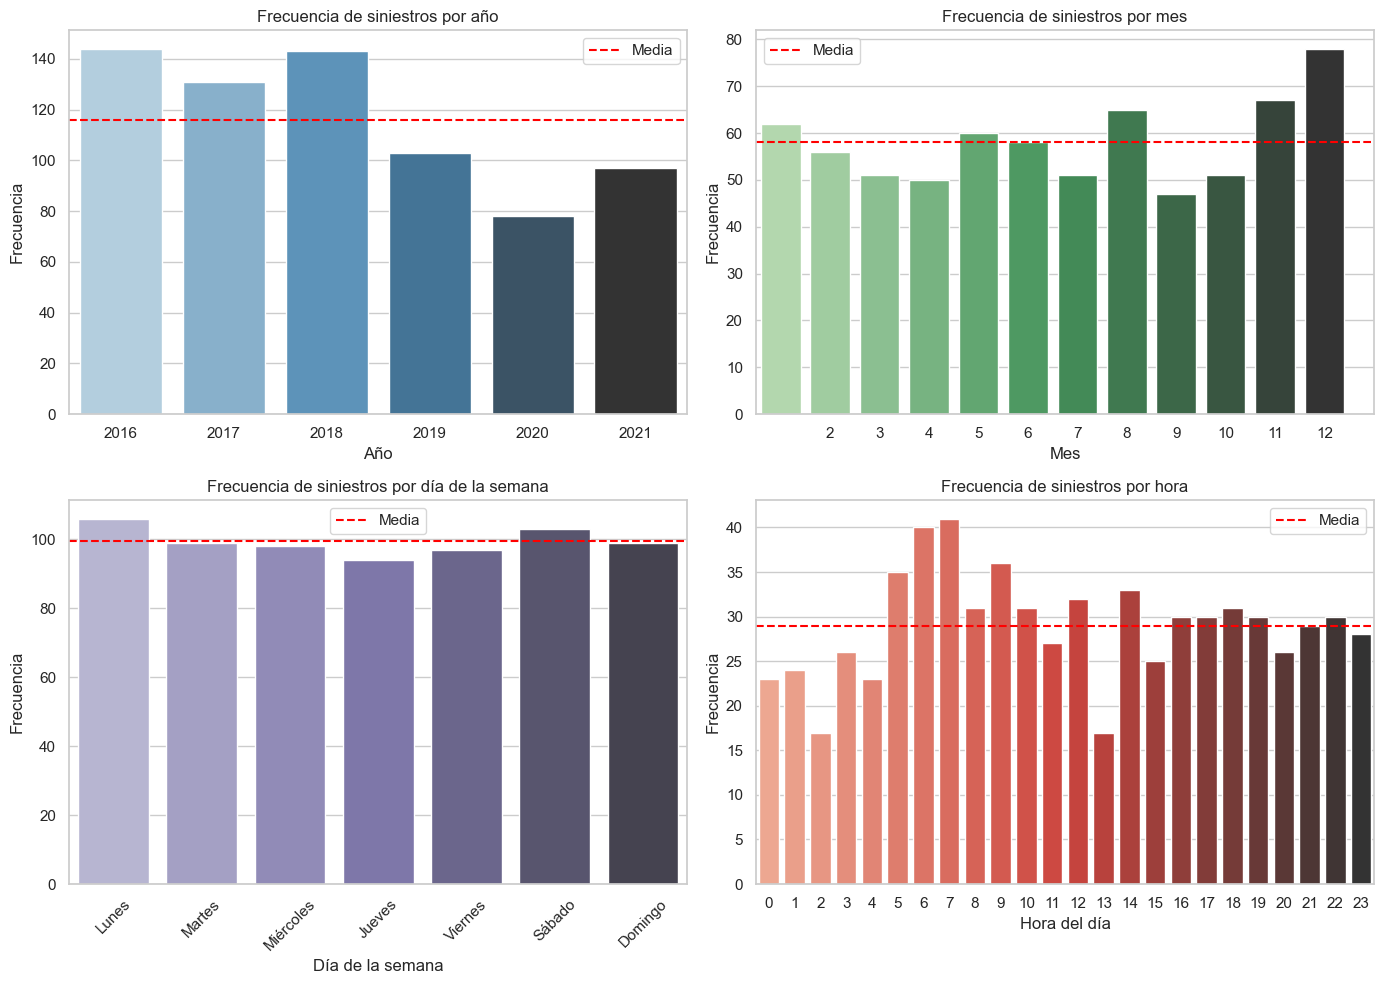

In [112]:
# Calcula e imprime estadísticas descriptivas: media, desv. estándar, mínimo, máximo, cuartiles
estadisticas_anual = frecuencia_anual.describe()
estadisticas_mensual = frecuencia_mensual.describe()
estadisticas_semanal = frecuencia_semanal.describe()
estadisticas_horaria = frecuencia_horaria.describe()

print("Estadísticas descriptivas por año:")
print(estadisticas_anual)

print("\nEstadísticas descriptivas por mes:")
print(estadisticas_mensual)

print("\nEstadísticas descriptivas por día de la semana:")
print(estadisticas_semanal)

print("\nEstadísticas descriptivas por hora:")
print(estadisticas_horaria)

# Genera histogramas y grafica la media para tener una primera impresión sobre la variabilidad 
# y patrones de los incidentes a cada escala temporal.
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Frecuencia de siniestros por año
plt.subplot(2, 2, 1)
sns.barplot(x=frecuencia_anual.index, y=frecuencia_anual.values, palette='Blues_d', hue=frecuencia_anual.index, dodge=False, legend=False)
plt.title('Frecuencia de siniestros por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.axhline(y=estadisticas_anual['mean'], color='red', linestyle='--', label='Media')
plt.legend()

# Frecuencia de siniestros por mes
plt.subplot(2, 2, 2)
sns.barplot(x=frecuencia_mensual.index, y=frecuencia_mensual.values, palette='Greens_d', hue=frecuencia_mensual.index, dodge=False, legend=False)
plt.title('Frecuencia de siniestros por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13))
plt.axhline(y=estadisticas_mensual['mean'], color='red', linestyle='--', label='Media', )
plt.legend()

# Frecuencia de siniestros por día de la semana
plt.subplot(2, 2, 3)
sns.barplot(x=frecuencia_semanal.index, y=frecuencia_semanal.values, palette='Purples_d', hue=frecuencia_semanal.index, dodge=False, legend=False)
plt.title('Frecuencia de siniestros por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.axhline(y=estadisticas_semanal['mean'], color='red', linestyle='--', label='Media')
plt.legend()

# Frecuencia de siniestros por hora
plt.subplot(2, 2, 4)
sns.barplot(x=frecuencia_horaria.index, y=frecuencia_horaria.values, palette='Reds_d', hue=frecuencia_horaria.index, dodge=False, legend=False)
plt.title('Frecuencia de siniestros por hora')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(24))
plt.axhline(y=estadisticas_horaria['mean'], color='red', linestyle='--', label='Media')
plt.legend()

# Quitar los decimales de las etiquetas del eje x en el gráfico de horas
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation=0, horizontalalignment='center')
ax.set_xticks(range(24))
ax.set_xticklabels([str(i) for i in range(24)])

plt.tight_layout()
plt.show()

REVISAR ESTA ANOVA, NO SE VE BIEN....

In [43]:
from scipy.stats import f_oneway, ttest_ind
# Pruebas ANOVA y t de Student
resultados = {}

# Prueba entre años (ANOVA)
años = homicidios_raw['AAAA'].unique()
grupos_años = [homicidios_raw[homicidios_raw['AAAA'] == año]['AAAA'] for año in años]
anova_años = f_oneway(*grupos_años)
resultados['ANOVA Años'] = anova_años.pvalue

# Realizar ANOVA para comparar las frecuencias de siniestros por mes
anova_mes = stats.f_oneway(*[homicidios_raw[homicidios_raw['MM'] == mes]['MM'].dropna() for mes in range(1, 13)])

# Realizar ANOVA para comparar las frecuencias de siniestros por día de la semana
anova_dia = stats.f_oneway(*[homicidios_raw[homicidios_raw['día_semana'] == dia]['día_semana'].dropna().index for dia in ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']])

# Realizar ANOVA para comparar las frecuencias de siniestros por hora
anova_hora = stats.f_oneway(*[homicidios_raw[homicidios_raw['HORA'] == hora]['HORA'].dropna().index for hora in range(24)])

print("\nANOVA resultados:")
print(f"Mes - F: {anova_mes.statistic}, p-value: {anova_mes.pvalue}")
print(f"Día de la semana - F: {anova_dia.statistic}, p-value: {anova_dia.pvalue}")
print(f"Hora - F: {anova_hora.statistic}, p-value: {anova_hora.pvalue}")

# Mostrar resultados
for prueba, pvalue in resultados.items():
    print(f'{prueba}: p-value = {pvalue}')



ANOVA resultados:
Mes - F: inf, p-value: 0.0
Día de la semana - F: 2.772634602748909, p-value: 0.011371235231685536
Hora - F: 0.5579676256636577, p-value: 0.9539129681097263
ANOVA Años: p-value = 0.0


C:\Users\occar\AppData\Local\Temp\ipykernel_53232\1414563506.py:8: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  anova_años = f_oneway(*grupos_años)
C:\Users\occar\AppData\Local\Temp\ipykernel_53232\1414563506.py:12: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  anova_mes = stats.f_oneway(*[homicidios_raw[homicidios_raw['MM'] == mes]['MM'].dropna() for mes in range(1, 13)])


ESTAS BOX PLOT TAMBIEN SE VEN RARAS

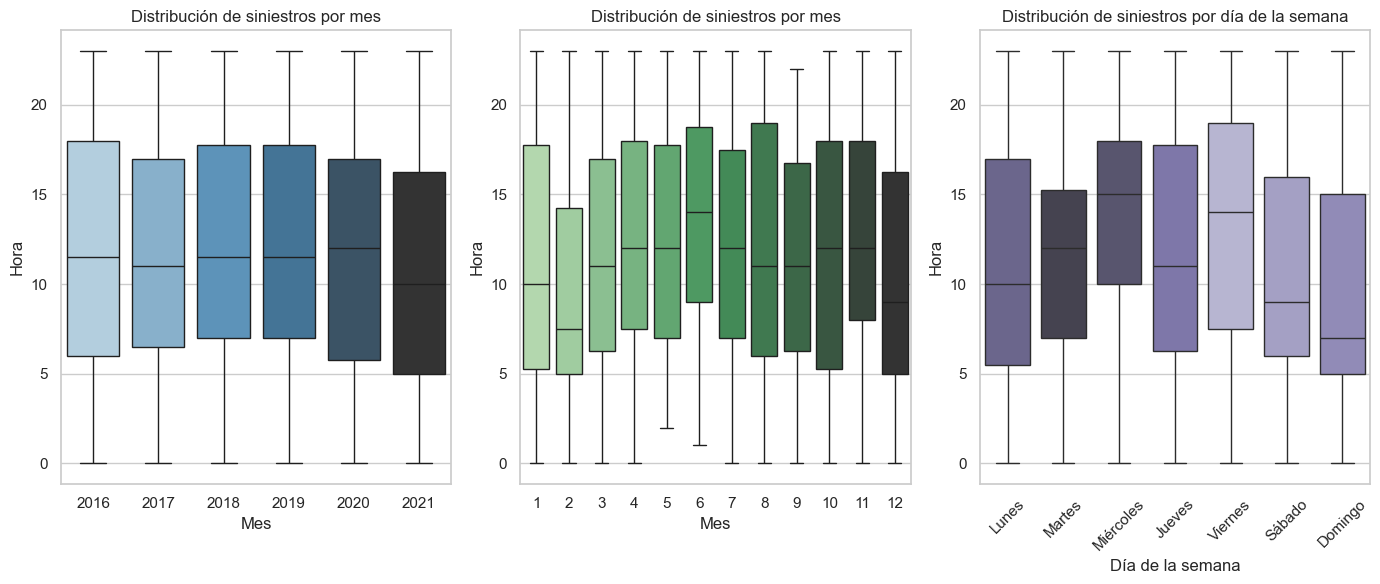

In [222]:
# Visualización con boxplots para ilustrar la distribución y diferencias entre grupos
# Boxplot por año
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='AAAA', y='HORA', data=homicidios_raw, palette='Blues_d',hue='AAAA', dodge=False, legend=False)
plt.title('Distribución de siniestros por mes')
plt.xlabel('Mes')
plt.ylabel('Hora')

# Boxplot por mes

plt.subplot(1, 3, 2)
sns.boxplot(x='MM', y='HORA', data=homicidios_raw, palette='Greens_d',hue='MM', dodge=False, legend=False)
plt.title('Distribución de siniestros por mes')
plt.xlabel('Mes')
plt.ylabel('Hora')

# Boxplot por día de la semana
plt.subplot(1, 3, 3)
sns.boxplot(x='día_semana', y='HORA', data=homicidios_raw, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],palette='Purples_d',hue='día_semana', dodge=False, legend=False)
plt.title('Distribución de siniestros por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Hora')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## 3. Distribución espacial de los incidentes
Hallazgos:
- La distribución de los sinistros es bastante amplia, cubriendo prácticamente toda la ciudad.
- Aunque el mapa de calor aplicado para el análisis no indica el número de incidentes (por ejemplo, a través de una simbología), es útil para identificar los sitios donde se concentran los siniestros, por ejemplo en las zonas de Liniers, Flores, Constitución, Balvanera, etc.

### 3.1 Mapas de distribución de siniestros

In [113]:
'''Se genera un mapa con las coordenadas de los campos "pos x" y "pos y", con un mapa base para dar contexto
y que permite acercarse o alejarse (zoom)'''

# Eliminar filas con valores NaN en las coordenadas para evitar errores al  momento de crear el mapa
homicidios_raw.dropna(subset=['pos x', 'pos y'], inplace=True)

# Crear un mapa centrado en las coordenadas promedio
center_lat = homicidios_raw['pos y'].mean()
center_lon = homicidios_raw['pos x'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Añadir puntos al mapa
for idx, row in homicidios_raw.iterrows():
    folium.Marker(
        location=[row['pos y'], row['pos x']],
        popup=f"Lat: {row['pos y']}, Lon: {row['pos x']}"
    ).add_to(m)

# Guardar el mapa en un archivo HTML.
m.save('mapa_homicidios.html')

# Mostrar el mapa 
m

In [114]:
# Eliminar filas con valores NaN en las coordenadas para evitar errores al momento de crear el mapa
homicidios_raw.dropna(subset=['pos x', 'pos y'], inplace=True)

# Crear un mapa centrado en las coordenadas promedio
center_lat = homicidios_raw['pos y'].mean()
center_lon = homicidios_raw['pos x'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Preparar los datos para el HeatMap
heat_data = [[row['pos y'], row['pos x']] for idx, row in homicidios_raw.iterrows()]

# Añadir el HeatMap al mapa, ajusta los parámetros radius y blur para mejorar el detalle en la visualización 
HeatMap(heat_data,radius=15,blur=12).add_to(m)

# Guardar el mapa en un archivo HTML.
m.save('mapa_calor_homicidios.html')

# Mostrar el mapa
m

### 3.2 Análisis por tipos de calles
Hallazgos:
- 

#### 3.2.1 Calcula tablas de frecuencias para los tipos de calles y nombres de las calles

In [115]:
'''Por tipo de calle'''
# En el dataset original, algunas filas contienen el texto "GRAL PAZ" en lugar del tipo de calle, por lo cual, primero vamos a reemplazar dicho texto por 
# el tipo de calle que es "AVENIDA"
homicidios_raw['TIPO_DE_CALLE'] = homicidios_raw['TIPO_DE_CALLE'].str.replace('GRAL PAZ', 'AVENIDA')

# Calcular las frecuencias de los tipos de calle
frecuencia_tipo_calles = homicidios_raw['TIPO_DE_CALLE'].value_counts()

# Convertir la serie resultante en un DataFrame
tabla_tipos_calles = frecuencia_tipo_calles.reset_index()

# Renombrar las columnas para que sean más descriptivas
tabla_tipos_calles.columns = ['Tipo de Calle', 'Frecuencia']

# Mostrar la tabla en formato amigable
display(tabla_tipos_calles)

'''Por nombre de la calle'''
# Calcular las frecuencias de los tipos de calle
frecuencia_nom_calles = homicidios_raw['Calle'].value_counts()

# Convertir la serie resultante en un DataFrame
tabla_nom_calles = frecuencia_nom_calles.reset_index()

# Renombrar las columnas para que sean más descriptivas
tabla_nom_calles.columns = ['Calle', 'Frecuencia']

# Mostrar la tabla en formato amigable
display(tabla_nom_calles)

,Tipo de Calle,Frecuencia
0,AVENIDA,493
1,CALLE,134
2,AUTOPISTA,57


,Calle,Frecuencia
0,"PAZ, GRAL. AV.",57
1,RIVADAVIA AV.,19
2,DEL LIBERTADOR AV.,18
3,"ALBERDI, JUAN BAUTISTA AV.",13
4,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,13
...,...,...
273,ALBERTI,1
274,QUESADA,1
275,CALIFORNIA,1
276,"CARRIL, SALVADOR MARIA DEL AV.",1


### 3.3 Histrogramas

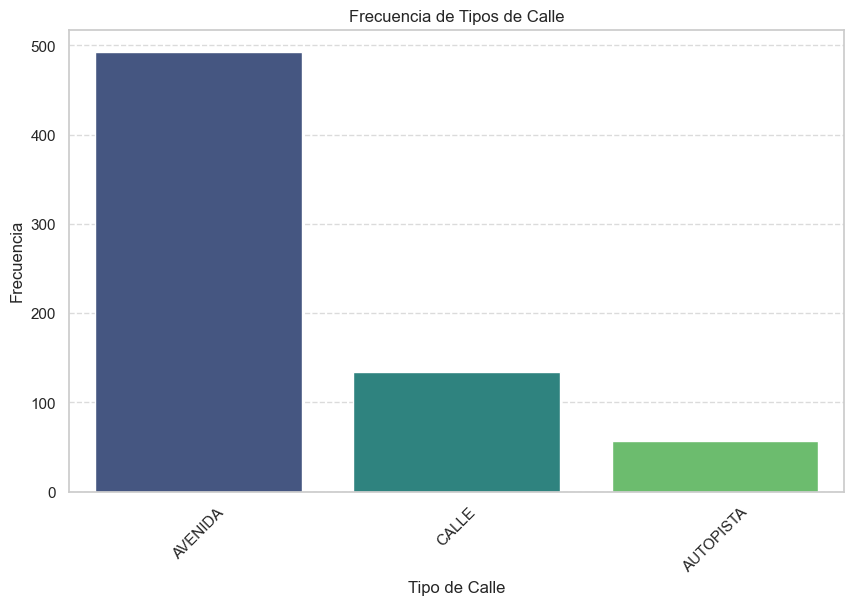

In [118]:
'''Histograma de frecuencias por tipo de calle'''
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Calle', y='Frecuencia', data=tabla_tipos_calles, palette='viridis', hue='Tipo de Calle', dodge=False, legend=False)

# Personalizar el gráfico
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de Calle')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)



Para cubrir el 80% de las incidencias, se necesita incluir las top 141 calles.


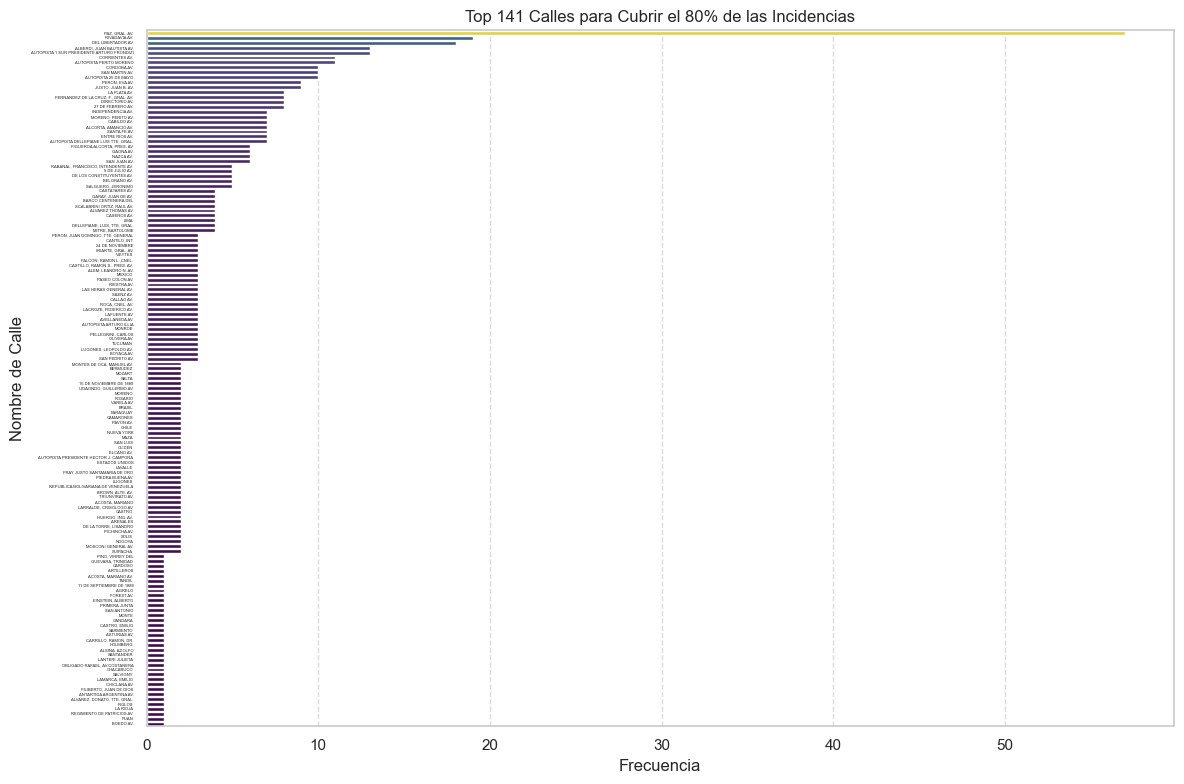

In [139]:
'''Calcula el número de calles necesario para cubrir el total de sinistros desde una perspectiva estadística. Esto servirá para conocer la distribución 
de siniestros en las distintas calles  de la ciudad con base en su NOMBRE.'''

# Calcular el porcentaje acumulado
tabla_nom_calles['Porcentaje Acumulado'] = tabla_nom_calles['Frecuencia'].cumsum() / tabla_nom_calles['Frecuencia'].sum() * 100

# Determinar el punto donde se alcanza el 80% de las incidencias
top_80_index = tabla_nom_calles[tabla_nom_calles['Porcentaje Acumulado'] <= 80].shape[0]

print(f"Para cubrir el 80% de las incidencias, se necesita incluir las top {top_80_index} calles.")

# Graficar la curva de Pareto
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Calle', data=tabla_nom_calles.head(top_80_index), palette='viridis',hue='Frecuencia', dodge=False, legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Nombre de Calle')
plt.title(f'Top {top_80_index} Calles para Cubrir el 80% de las Incidencias')
plt.yticks(fontsize=3)  # Cambia el tamaño de la fuente según sea necesario

# Hacer zoom en una porción específica del gráfico
# Puedes ajustar los valores de ylim() según sea necesario
#plt.ylim(10,0)  # Cambia estos valores para hacer zoom en el rango deseado

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

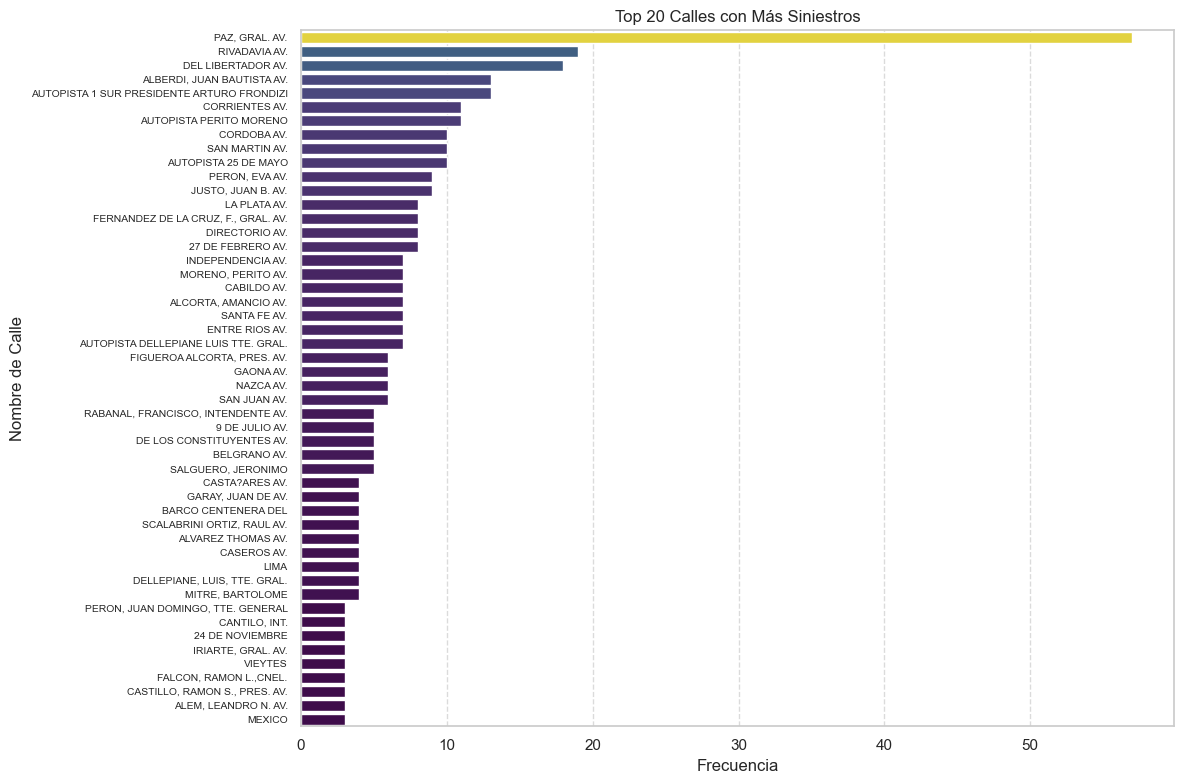

In [144]:
'''Este histograma se puede considerar un zoom del histograma anterior, sirve para apreciar los nombres de las calles con mayor número de siniestros, así como para obtener
un mayor detalle visual de la distribución de frecuencias entre las 20 calles con más siniestros. En este histograma se puede apreciar a simple vista que la Avenida General Paz posee
la mayor cantidad de siniestros, muy por encima del resto de las calles de la ciudad. '''
# Seleccionar las 20 calles más frecuentes
top_calles = frecuencia_nom_calles.head(50).reset_index()
top_calles.columns = ['Nombre de Calle', 'Frecuencia']

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Nombre de Calle', data=top_calles, palette='viridis', hue='Frecuencia', dodge=False, legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Nombre de Calle')
plt.title('Top 20 Calles con Más Siniestros')
plt.yticks(fontsize=7.5)  # Cambia el tamaño de la fuente según sea necesario
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

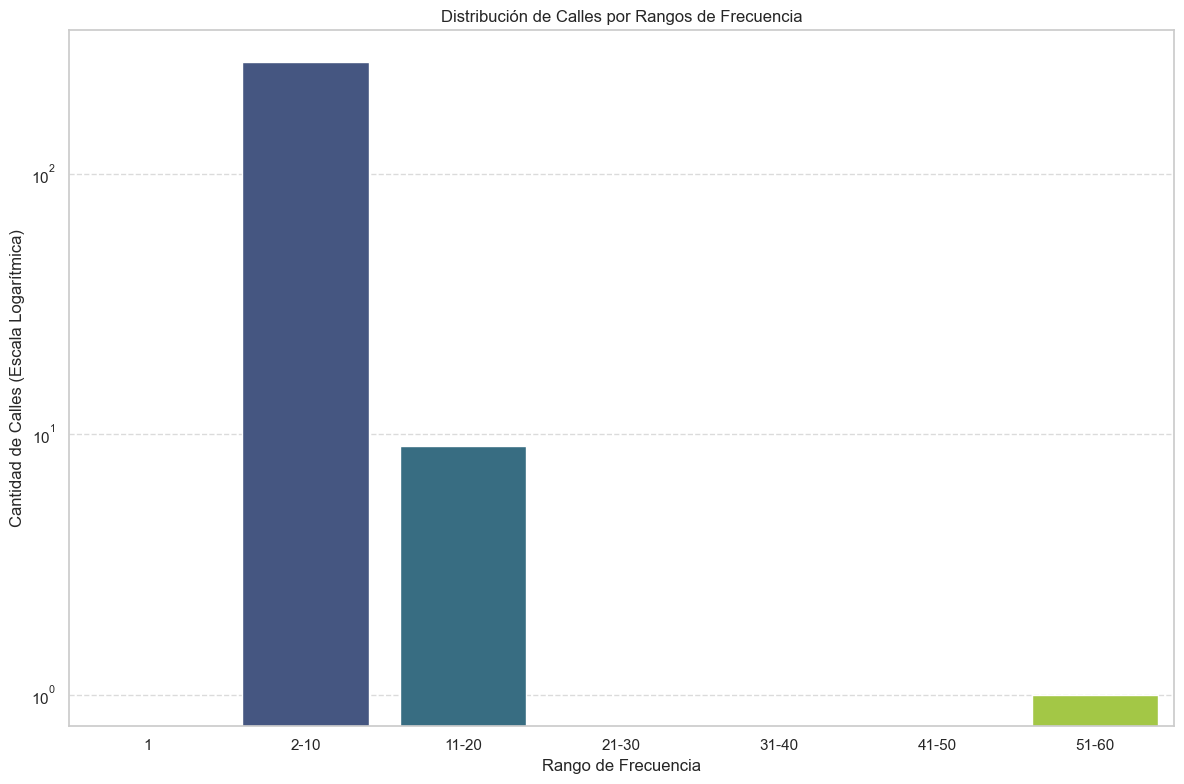

In [145]:
'''Otra forma de tener una vista general de toda la distribución de siniestros de acuerdo al nombre de las calles, se puede generar un gráfico de frecuencias AGRUPADAS. Una manera de
interpretar este gráfico sería: indica el número de calles que presentan distintos rangos de siniestros. En este caso particular, la mayoría de las calles presentan entre 2 y 10 siniestros,
mientras que solo una calle presenta entre 50 y 60 siniestros en el dataset. El gráfico se presenta utilizando una escala logarítmica debido a que existe una diferencia importante entre la 
cantidad de calles para cada rango de frecuencias lo cual invisibiliza las barras más pequeñas. Este es un gráfico resumela información brindada en los otros infográficos, pues nos indica que la 
mayoría de los siniestros se distribuyen en un gran número de calles (más de 200) sin embargo, una sola calle concentra más de 50 siniestros.'''
bins = [0, 1, 10, 20, 30, 40, 50, 60]
labels = ['1', '2-10', '11-20', '21-30', '31-40', '41-50', '51-60']

# Asignar cada frecuencia a un rango
tabla_nom_calles['Rango de Frecuencia'] = pd.cut(tabla_nom_calles['Frecuencia'], bins=bins, labels=labels, right=False)
rangos_frecuencia = tabla_nom_calles['Rango de Frecuencia'].value_counts().sort_index().reset_index()
rangos_frecuencia.columns = ['Rango de Frecuencia', 'Cantidad de Calles']

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el histograma de rangos de frecuencia con escala logarítmica en el eje y
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Rango de Frecuencia', y='Cantidad de Calles', data=rangos_frecuencia, palette='viridis', hue='Rango de Frecuencia', dodge=False, legend=False)
ax.set_yscale("log")

# Personalizar el gráfico
plt.xlabel('Rango de Frecuencia')
plt.ylabel('Cantidad de Calles (Escala Logarítmica)')
plt.title('Distribución de Calles por Rangos de Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### 3.4 Nube de palabras

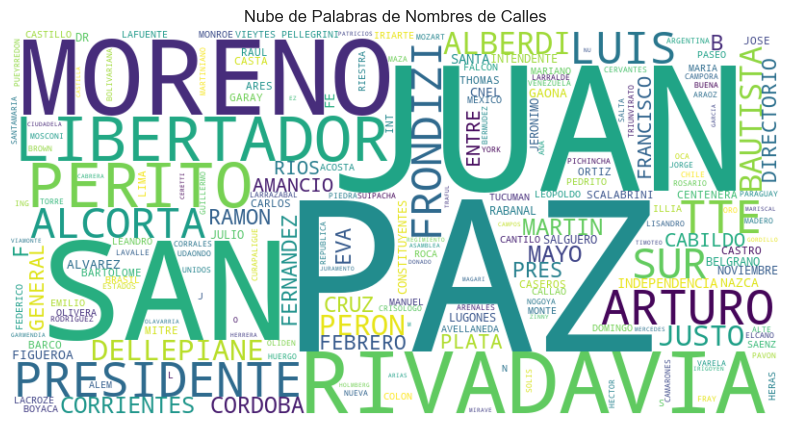

In [102]:
'''Se generó una nube de palabras a partir de los nombres de las calles, solo para tener una idea de cuáles nombres  de calles son más frecuentes, es decir, los nombres
de las calles donde ocurren más siniestros'''
# Concatenar todos los nombres de calles en una sola cadena, usando un delimitador especial (como '|')
text = '|'.join(homicidios_raw['Calle'].dropna().tolist())

# Definir stopwords adicionales
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['AV', 'LA', 'EL', 'LOS', 'LAS', 'DE', 'DEL', 'Y','GRAL','AUTOPISTA'])

# Crear la nube de palabras, tratando el delimitador especial como una palabra normal
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', width=800, height=400, collocations=False).generate(text)

# Convertir el delimitador especial a espacios en la imagen generada
wordcloud.words_ = {k.replace('|', ' '): v for k, v in wordcloud.words_.items()}

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Nombres de Calles')
plt.show()

## 4. ANÁLISIS POR TIPOS DE INVOLUCRADOS

### 4.1 Frecuencias por tipo de involucrados

In [229]:
'''Por tipo de víctima'''
# Calcular las frecuencias de los tipos de victimas
frecuencia_tipo_victima = homicidios_raw['VICTIMA'].value_counts()

# Convertir la serie resultante en un DataFrame
tabla_tipos_victima = frecuencia_tipo_victima.reset_index()

# Renombrar las columnas para que sean más descriptivas
tabla_tipos_victima.columns = ['Tipo de Víctima', 'Frecuencia']

# Mostrar la tabla en formato amigable
display(tabla_tipos_victima)

'''Por tipo de acusado'''
# Calcular las frecuencias de los tipos de acusados
frecuencia_tipo_acusado = homicidios_raw['ACUSADO'].value_counts()

# Convertir la serie resultante en un DataFrame
tabla_tipos_acusado = frecuencia_tipo_acusado.reset_index()

# Renombrar las columnas para que sean más descriptivas
tabla_tipos_acusado.columns = ['Tipo de Acusado', 'Frecuencia']

# Mostrar la tabla en formato amigable
display(tabla_tipos_acusado)

'''Por participantes'''
# Calcular las frecuencias de los tipos participantes
frecuencia_tipo_part = homicidios_raw['PARTICIPANTES'].value_counts()

# Convertir la serie resultante en un DataFrame
tabla_tipos_part = frecuencia_tipo_part.reset_index()

# Renombrar las columnas para que sean más descriptivas
tabla_tipos_part.columns = ['Participantes (Victima-Acusado)', 'Frecuencia']

# Mostrar la tabla en formato amigable
display(tabla_tipos_part)

,Tipo de Víctima,Frecuencia
0,MOTO,288
1,PEATON,261
2,AUTO,82
3,BICICLETA,29
4,SD,8
5,CARGAS,7
6,PASAJEROS,5
7,MOVIL,2
8,OBJETO FIJO,1
9,PEATON_MOTO,1


,Tipo de Acusado,Frecuencia
0,AUTO,202
1,PASAJEROS,172
2,CARGAS,141
3,OBJETO FIJO,61
4,MOTO,57
5,SD,20
6,MULTIPLE,17
7,BICICLETA,7
8,OTRO,6
9,TREN,1


,Participantes (Victima-Acusado),Frecuencia
0,PEATON-PASAJEROS,105
1,MOTO-AUTO,83
2,PEATON-AUTO,76
3,MOTO-CARGAS,74
4,MOTO-PASAJEROS,45
5,MOTO-OBJETO FIJO,39
6,PEATON-CARGAS,37
7,PEATON-MOTO,30
8,AUTO-AUTO,30
9,MOTO-MOTO,25


### 4.2 Histogramas por tipo de involucrados

Se observa que la mayor cantidad de siniestros involucran como víctimas a personas que transitaban en motocicleta o bien como peatones, mientras que las personas acusadas de provocar el siniestro ocupaban un vehículo de transporte público ("pasajeros") o un auto. 

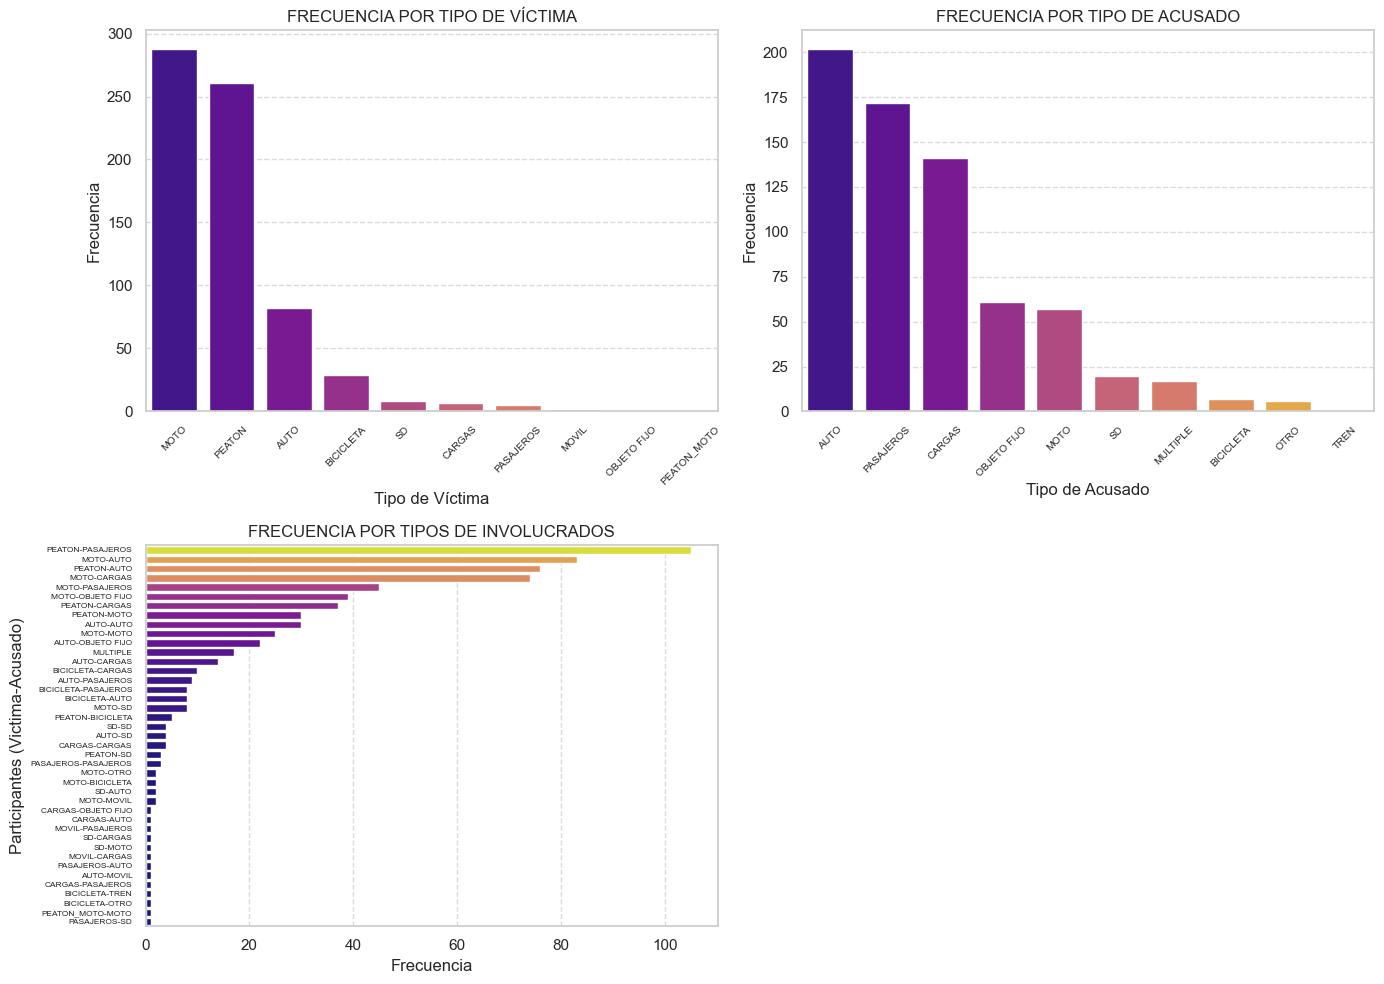

In [211]:
'''Histograma de frecuencias por tipo de involucrados'''

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Frecuencia de siniestros por año
plt.subplot(2, 2, 1)
# Crear el gráfico de barras
#plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Víctima', y='Frecuencia', data=tabla_tipos_victima, palette='plasma', hue='Tipo de Víctima', dodge=False, legend=False)

# Personalizar el gráfico
plt.xlabel('Tipo de Víctima')
plt.ylabel('Frecuencia')
plt.title('FRECUENCIA POR TIPO DE VÍCTIMA')
plt.xticks(rotation=45)
plt.xticks(fontsize=7.5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Crear el gráfico de barras
plt.subplot(2, 2, 2)
#plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Acusado', y='Frecuencia', data=tabla_tipos_acusado, palette='plasma', hue='Tipo de Acusado', dodge=False, legend=False)

# Personalizar el gráfico
plt.xlabel('Tipo de Acusado')
plt.ylabel('Frecuencia')
plt.title('FRECUENCIA POR TIPO DE ACUSADO')
plt.xticks(rotation=45)
plt.xticks(fontsize=7.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Configuración del estilo de Seaborn
plt.subplot(2, 2, 3)
# Crear el gráfico de barras
#plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Participantes (Victima-Acusado)', data=tabla_tipos_part, palette='plasma', hue='Frecuencia', dodge=False, legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Participantes (Victima-Acusado)')
plt.title('FRECUENCIA POR TIPOS DE INVOLUCRADOS')
plt.yticks(fontsize=6)  # Cambia el tamaño de la fuente según sea necesario
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



### 4.3 Exploración del perfil de las víctimas
Hallazgos:
 - La mayoría de las víctimas son hombres con edad entre los 20 y los 40 años.
 - Se observa que la mayoría de las víctimas son personas que conducen motocicletas o bien peatonas (primer y segundo lugar respectivamente). Le siguen personas conductoras de autos y acompañantes.
 - Por otra parte, la mayoría de las víctimas de sexo masculino tenían un rango de edad entre los 26 y los 49 años; se identifican algunos OUTLIERS, es decir, las víctimas hombres cuya edad rebasó el rango de datos típico (Q3+1.5*IQR), con edades que superan los 83.5 años. En cambio, la distribución de edades de las víctimas de sexo femenino es más amplia, pues el rango de edades de la mayoría se encuentra entre los 30 y los 70 años, por lo tanto el rango típico de las víctimas mujeres es mucho más amplio y puede ir hasta los 130 años (teóricamente); es muy probable que a esto se deba que en la gráfica de cajas y bigotes no se identifican valores atípicos (outliers) como en el caso de los hombres.
  - Tanto conductores y acompañantes tienen perfiles de edad similares en cuanto a su mediana y rango intercuartil (entre 22 y 41 años), en ambos casos se identifican valores atípicos de edades superiores a los 69 años.
 - Es muy evidente la diferencia del perfil de edad de cada uno de los otros tipos de víctimas, en especial el de los peatones, pues su rango de edades es el más elevado (entre 37 y 73 años), le siguen los rangos de las víctimas de las cuales no hay registro (SD) y luego el de los ciclistas con un rango entre 24 y 50 años. Con base en esta información de edades, se pueden construir distintas hipótesis; por ejemplo, puede ser que las personas de edad mayor tienden a sufrir mayores accidentes cuando transitan como peatones que como conductores/acompañantes; caso inverso al de las víctimas de menor edad. Aunque la base de datos no brinda mayor información sobre el perfil de las víctimas, estos hallazgos pueden servir de justificación para ahondar en estos temas particulares y enfocar estrategias de prevención para estos sectores.



In [230]:
# Crea una copia de la hoja de víctimas original victimas_raw para modificar y trabajar sobre la copia
columnas = ['ROL', 'VICTIMA','SEXO','EDAD']
perfil_victima = victimas_raw[columnas].copy()


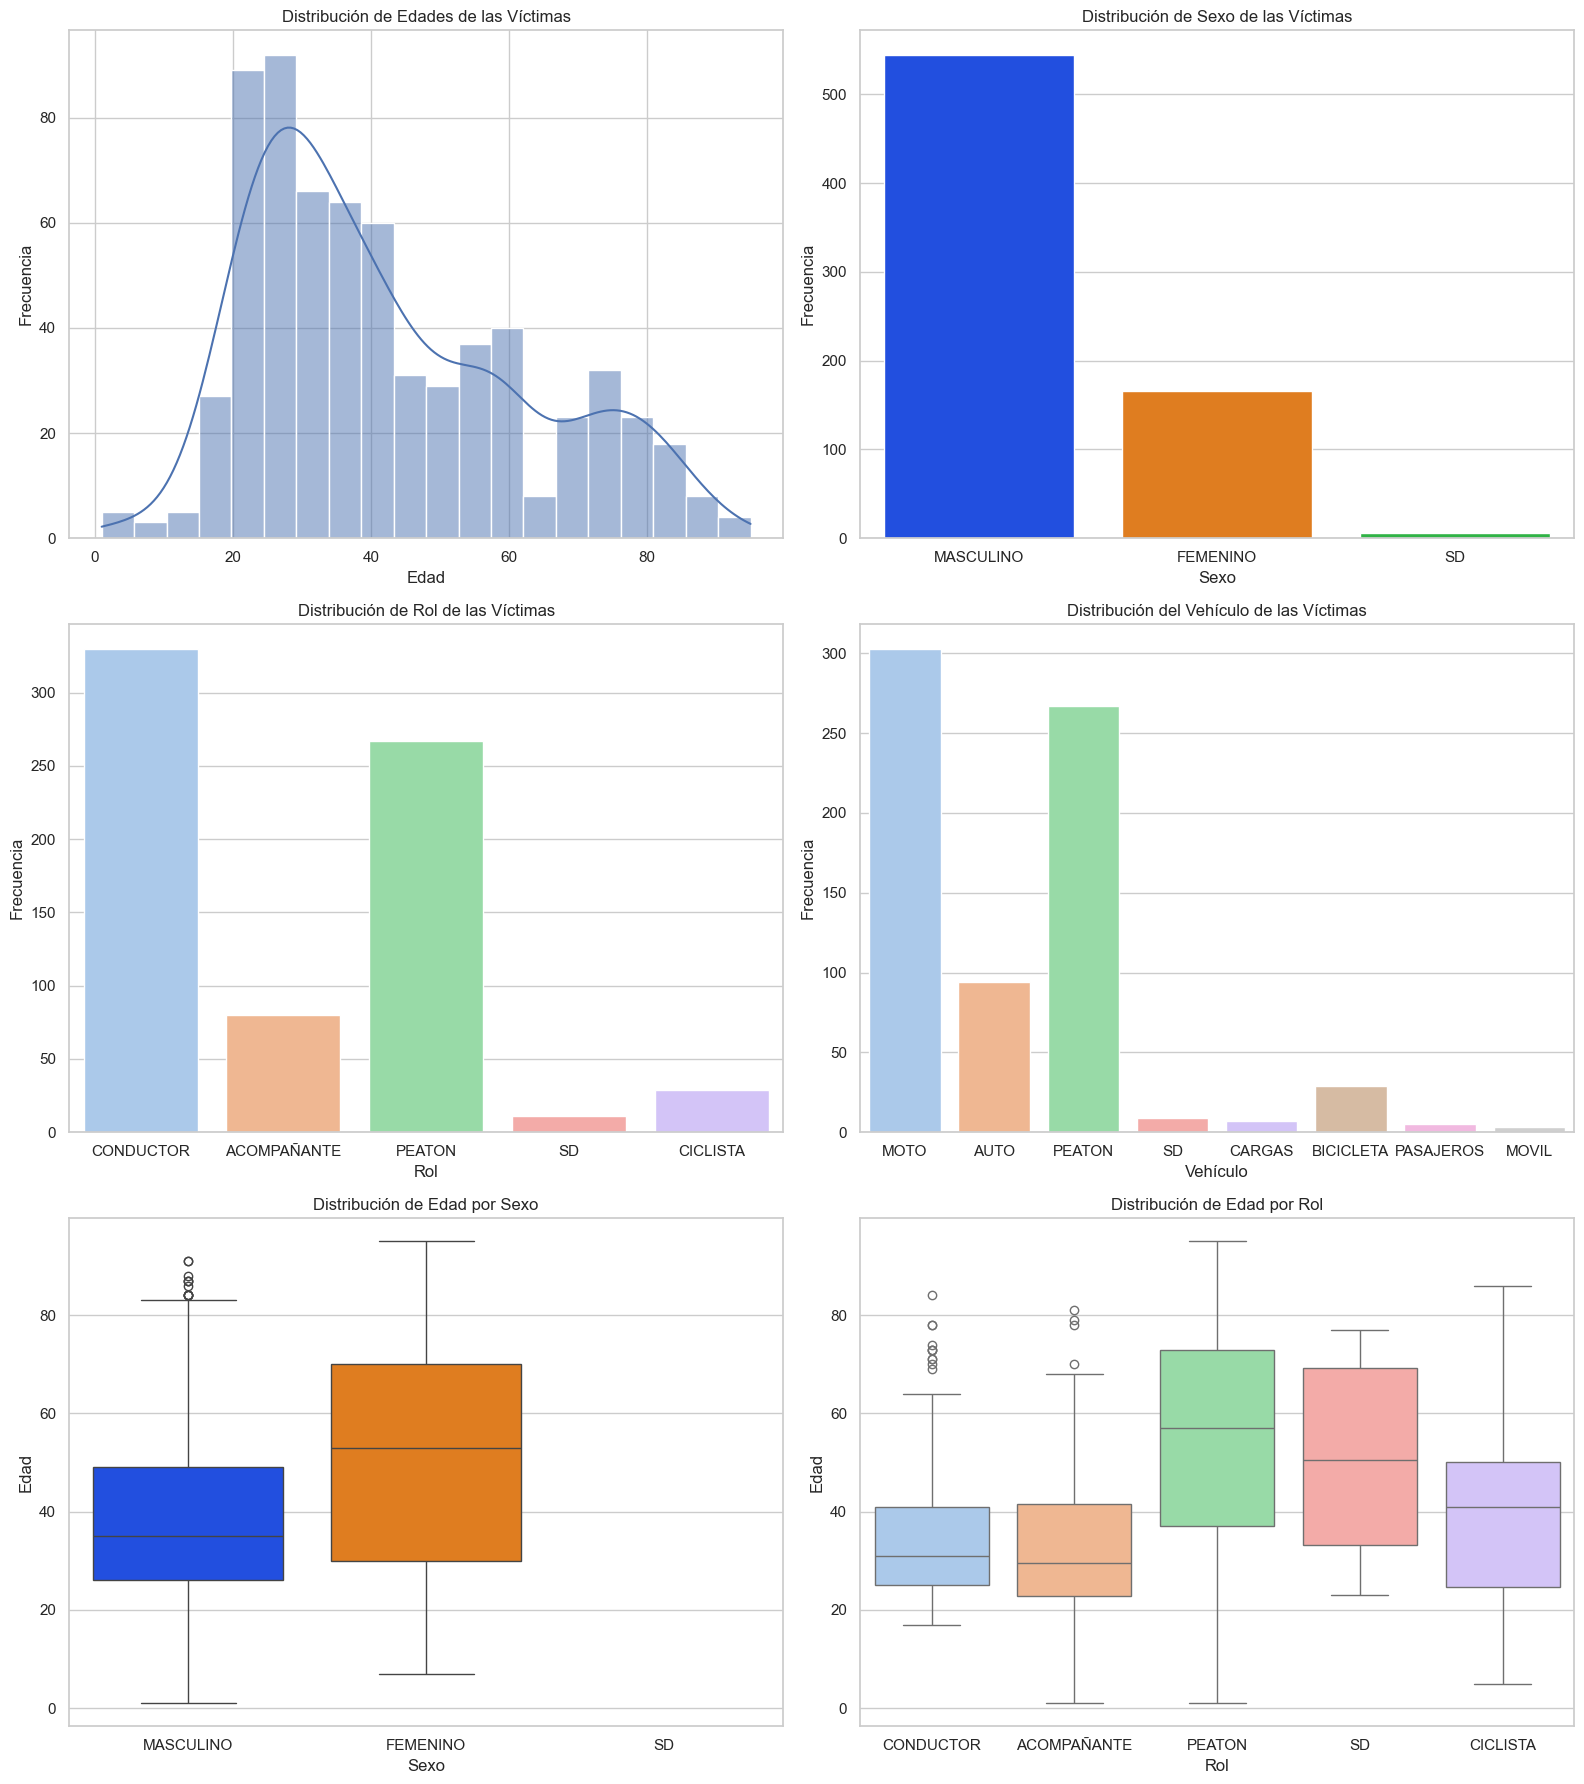

In [226]:
'''Genera histogramas sobre los distintos aspectos del perfil de las víctimas, también genera gráficas de cajas y bigotes para empezar a establecer patrones entre algunas combinaciones de variables'''
# Crear la figura y los subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Histograma de Edades
sns.histplot(perfil_victima['EDAD'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edades de las Víctimas')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de Barras para Sexo
sns.countplot(data=perfil_victima, x='SEXO', palette='bright',ax=axes[0, 1],hue='SEXO', dodge=False, legend=False)
axes[0, 1].set_title('Distribución de Sexo de las Víctimas')
axes[0, 1].set_xlabel('Sexo')
axes[0, 1].set_ylabel('Frecuencia')


# Reemplazar la palabra "PASAJERO_ACOMPAÑANTE" por "ACOMPAÑANTE" para ahorra espacio en la gráfica y hacerla más atractiva
perfil_victima['ROL'] = perfil_victima['ROL'].replace('PASAJERO_ACOMPAÑANTE', 'ACOMPAÑANTE')
# Gráfico de Barras para ROL
sns.countplot(data=perfil_victima, x='ROL', palette='pastel', ax=axes[1, 0],hue='ROL', dodge=False, legend=False)
axes[1, 0].set_title('Distribución de Rol de las Víctimas')
axes[1, 0].set_xlabel('Rol')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico de Barras para VICTIMA
sns.countplot(data=perfil_victima, x='VICTIMA', palette='pastel', ax=axes[1, 1],hue='VICTIMA', dodge=False, legend=False)
axes[1, 1].set_title('Distribución del Vehículo de las Víctimas')
axes[1, 1].set_xlabel('Vehículo')
axes[1, 1].set_ylabel('Frecuencia')

# Boxplot de Edad por Sexo
sns.boxplot(data=perfil_victima, x='SEXO', y='EDAD', palette='bright', ax=axes[2, 0],hue='SEXO', dodge=False, legend=False)
axes[2, 0].set_title('Distribución de Edad por Sexo')
axes[2, 0].set_xlabel('Sexo')
axes[2, 0].set_ylabel('Edad')

# Boxplot de Edad por Rol
sns.boxplot(data=perfil_victima, x='ROL', y='EDAD', palette='pastel', ax=axes[2, 1],hue='ROL', dodge=False, legend=False)
axes[2, 1].set_title('Distribución de Edad por Rol')
axes[2, 1].set_xlabel('Rol')
axes[2, 1].set_ylabel('Edad')


# Ajustar el layout para que no haya solapamientos
plt.tight_layout()
plt.show()




In [236]:
'''Cálculo de los valores de los cuartiles y bigotes de las gráficas boxplot (cajas y bigotes) anteriores para precisar su interpretación'''

# Función para calcular cuartiles y límites de los bigotes
def calcular_cuartiles_y_bigotes(df, grupo_col, valor_col):
    cuartiles = df.groupby(grupo_col)[valor_col].quantile([0.25, 0.5, 0.75]).unstack()
    iqr = cuartiles[0.75] - cuartiles[0.25]
    cuartiles['bigote_inf'] = cuartiles[0.25] - 1.5 * iqr
    cuartiles['bigote_sup'] = cuartiles[0.75] + 1.5 * iqr
    return cuartiles

# Calcular cuartiles y límites de los bigotes por SEXO
cuartiles_sexo = calcular_cuartiles_y_bigotes(perfil_victima, 'SEXO', 'EDAD')

# Calcular cuartiles y límites de los bigotes por ROL
cuartiles_rol = calcular_cuartiles_y_bigotes(perfil_victima, 'ROL', 'EDAD')

# Mostrar las tablas usando display
print("Cuartiles de Edad y Límites de Bigotes por Sexo:")
display(cuartiles_sexo)

print("Cuartiles de Edad y Límites de Bigotes por ROL de las víctimas:")
display(cuartiles_rol)

Cuartiles de Edad y Límites de Bigotes por Sexo:


,0.25,0.5,0.75,bigote_inf,bigote_sup
SEXO,,,,,
FEMENINO,30.0,53.0,70.0,-30.0,130.0
MASCULINO,26.0,35.0,49.0,-8.5,83.5
SD,NaN,NaN,NaN,NaN,NaN


Cuartiles de Edad y Límites de Bigotes por ROL de las víctimas:


,0.25,0.5,0.75,bigote_inf,bigote_sup
ROL,,,,,
CICLISTA,24.75,41.0,50.00,-13.125,87.875
CONDUCTOR,25.00,31.0,41.00,1.000,65.000
PASAJERO_ACOMPAÑANTE,22.75,29.5,41.50,-5.375,69.625
PEATON,37.00,57.0,73.00,-17.000,127.000
SD,33.25,50.5,69.25,-20.750,123.250


## JOIN PARA EXPLORAR COMO SE DISTRIBUYEN LOS DISTINTOS PERFILES DE VÍCTIMAS Y ACUSADOS

Hallazgos:
 - La distribución espacial de los hombres es muy similar a la reportada anteriormente para toda la base de datos, lo cual reafirma el hecho de que la mayoría de los sinistros reporta víctimas con ese perfil.
 - La distribución espacial de las mujeres es distinta, concentrando la mayoría de las víctimas en cuatro zonas: 1) alrededor del cruce de la Autopista presidente Héctor José Cámpora con Autopista 25 de Mayo, 2) alrededor de la Plaza La Vuelta de Obligado, entre las calles Avenida Brasil y Juan de Garay, 3) alrededor del cruce de la Avenida Pedro Mendoza y Autopista presidente Arturo, 4) alrededor del cruce de las avenidas Juan Bautista y Sante Fe.
 

In [ ]:
# Unir los DataFrames homicidios_raw (hoja HECHOS) y victimas (hoja VICTIMAS)
combinado_hv = pd.merge(homicidios_raw, victimas_raw, left_on='ID', right_on='ID_hecho')

# Analizar el resultado con base en las columnas, tipos de datos, número de filas
combinado_hv.info()

In [ ]:
'''Se identificó que el dataframe tiene una longitud mayor que el de homicidios_raw. Para explicar esto se comprueba la hipótesis de que existen varias víctimas registradas con el mismo ID cuando pertenecen al mismo siniestro.'''
# Detectar valores repetidos en la columna 'ID_hecho'
repeated_values = victimas_raw['ID_hecho'].value_counts()

# Filtrar solo los valores que se repiten (conteo mayor a 1)
repeated_values = repeated_values[repeated_values > 1].index

# Filtrar el DataFrame original para obtener solo las filas con valores repetidos en 'ID_hecho'
df_repetidos = victimas_raw[victimas_raw['ID_hecho'].isin(repeated_values)]

print("Filas con valores repetidos en la columna 'ID_hecho':")
display(df_repetidos)


In [263]:
'''Crea los filtros para mapear distintos perfiles de víctimas y otros datos interesants de acuerdo al análisis previo'''

combinado_hv.dropna(subset=['pos x', 'pos y'], inplace=True)



In [269]:
'''MAPA HOMBRES CON EDAD ENTRE 26 Y 49 AÑOS (CUARTILES 1 Y 3)'''
# Filtro:
hombres_26_49 = combinado_hv[(combinado_hv['SEXO'] == 'MASCULINO') & (combinado_hv['EDAD'].between(26, 49))]

#Crear el mapa centrado en la ubicación media de los datos
map_heat = folium.Map(location=[hombres_26_49['pos y'].mean(), hombres_26_49['pos x'].mean()], zoom_start=12)
# Añadir el heatmap

heat_data = [[row['pos y'], row['pos x']] for index, row in hombres_26_49.iterrows()]
HeatMap(heat_data).add_to(map_heat)

# Mostrar el mapa
map_heat.save('map_heat.html')

map_heat

In [273]:
'''MAPA MUJERES CON EDAD ENTRE 30 Y 70 AÑOS (CUARTILES 1 Y 3)'''
# Filtro:
mujeres_30_70 = combinado_hv[(combinado_hv['SEXO'] == 'FEMENINO') & (combinado_hv['EDAD'].between(26, 49))]

#Crear el mapa centrado en la ubicación media de los datos
map_heat = folium.Map(location=[mujeres_30_70['pos y'].mean(), mujeres_30_70['pos x'].mean()], zoom_start=12)
# Añadir el heatmap

heat_data = [[row['pos y'], row['pos x']] for index, row in mujeres_30_70.iterrows()]
HeatMap(heat_data).add_to(map_heat)

# Mostrar el mapa
map_heat.save('map_heat.html')

map_heat

In [274]:
'''MAPA POR HORARIOS'''
# Filtro:
mañana = combinado_hv[(combinado_hv['HH'].between('04:59', '12:59'))]

#Crear el mapa centrado en la ubicación media de los datos
map_heat = folium.Map(location=[mañana['pos y'].mean(), mañana['pos x'].mean()], zoom_start=12)
# Añadir el heatmap

heat_data = [[row['pos y'], row['pos x']] for index, row in mañana.iterrows()]
HeatMap(heat_data).add_to(map_heat)

# Mostrar el mapa
map_heat.save('map_heat.html')

map_heat

TypeError: '>=' not supported between instances of 'int' and 'str'